# Exploring Warrington's Air Quality Data
---
## A1 Data Wrangling

JWriggy

**data: © Crown 2020 copyright Defra via uk-air.defra.gov.uk, licenced under the [Open Government Licence (OGL)](http://www.nationalarchives.gov.uk/doc/open-government-licence/version/2/)**

**Air pollutant measurements from the Automatic Urban and Rural Network (AURN) are available for download as ready formatted R objects together with some modelled meteorological data. The importAURN utility from the [openair](https://github.com/davidcarslaw/openair) package, courtesy of David Carslaw is available to import the data from selected sites and years. For this analysis 10 sites were chosen from the North West of England measuring background air pollutants (ie away from the kerbside where traffic effects might dominate). These all had over ten years worth of hourly measurements though not all pollutants are measured at each site.**

**The data were imported as R objects and written out to csv files for analysis with python. The code below reads these into pandas dataframes. Some checks are done to identify missing data and the data is aggregated for each pollutant of interest for later analysis. (Approx 30 MB)**


In [1]:
import pandas as pd
import glob

import seaborn as sns
import matplotlib.pyplot as plt

# limit display to 2 dp
pd.options.display.float_format = '{:,.2f}'.format 
# for styling tables
cm = sns.light_palette("#b0c4de", as_cmap=True)

##  Load the raw csv files into pandas dataframes

In [2]:
glob.glob("data/*.csv") # list datafiles

['data/PRES20.csv',
 'data/MAN320.csv',
 'data/WAR20.csv',
 'data/ECCL20.csv',
 'data/BLC220.csv',
 'data/WIG520.csv',
 'data/GLAZ20.csv',
 'data/LVP20.csv',
 'data/LB20.csv',
 'data/TRAN20.csv']

In [3]:
## csv files total approx 110MB
# 2009-sep20
WAR  = pd.read_csv('data/WAR20.csv',  index_col=["date", "site"],  parse_dates=True, infer_datetime_format=True) 
GLAZ = pd.read_csv('data/GLAZ20.csv', index_col=["date", "site"],  parse_dates=True, infer_datetime_format=True)
LVP  = pd.read_csv('data/LVP20.csv',  index_col=["date", "site"],  parse_dates=True, infer_datetime_format=True) 
ECCL = pd.read_csv('data/ECCL20.csv', index_col=["date", "site"],  parse_dates=True, infer_datetime_format=True) 
WIG5 = pd.read_csv('data/WIG520.csv', index_col=["date", "site"],  parse_dates=True, infer_datetime_format=True) 
MAN3 = pd.read_csv('data/MAN320.csv', index_col=["date", "site"],  parse_dates=True, infer_datetime_format=True) 
LB   = pd.read_csv('data/LB20.csv',   index_col=["date", "site"],  parse_dates=True, infer_datetime_format=True) 
BLC2 = pd.read_csv('data/BLC220.csv', index_col=['date','site'],  parse_dates=True, infer_datetime_format=True) 
TRAN = pd.read_csv('data/TRAN20.csv', index_col=['date','site'],  parse_dates=True, infer_datetime_format=True) 
PRES = pd.read_csv('data/PRES20.csv', index_col=['date','site'],  parse_dates=True, infer_datetime_format=True) 

In [4]:
# a look at the raw data
WAR.head()

,,pm10,no,no2,nox,nv10,nv2.5,pm2.5,v10,v2.5,code,temp,ws,wd,at10,ap10,at25,ap25
date,site,,,,,,,,,,,,,,,,,
2009-01-01 00:00:00,Warrington,69.00,35.00,52.00,105.00,56.00,53.00,59.00,13.00,6.00,WAR,nan,nan,nan,nan,nan,nan,nan
2009-01-01 01:00:00,Warrington,53.00,16.00,44.00,69.00,43.00,40.00,47.00,10.00,7.00,WAR,nan,nan,nan,nan,nan,nan,nan
2009-01-01 02:00:00,Warrington,48.00,26.00,46.00,86.00,39.00,34.00,42.00,9.00,8.00,WAR,nan,nan,nan,nan,nan,nan,nan
2009-01-01 03:00:00,Warrington,56.00,18.00,53.00,80.00,48.00,42.00,50.00,8.00,8.00,WAR,nan,nan,nan,nan,nan,nan,nan
2009-01-01 04:00:00,Warrington,52.00,20.00,57.00,88.00,44.00,42.00,50.00,8.00,8.00,WAR,nan,nan,nan,nan,nan,nan,nan


In [5]:
WAR.tail()

,,pm10,no,no2,nox,nv10,nv2.5,pm2.5,v10,v2.5,code,temp,ws,wd,at10,ap10,at25,ap25
date,site,,,,,,,,,,,,,,,,,
2020-12-31 19:00:00,Warrington,28.02,19.74,47.87,78.13,nan,nan,25.00,nan,nan,WAR,0.10,1.40,304.00,nan,nan,nan,nan
2020-12-31 20:00:00,Warrington,19.32,2.40,34.02,37.70,nan,nan,20.00,nan,nan,WAR,0.70,1.80,320.50,nan,nan,nan,nan
2020-12-31 21:00:00,Warrington,17.39,1.77,31.30,34.02,nan,nan,17.00,nan,nan,WAR,1.00,2.10,319.10,nan,nan,nan,nan
2020-12-31 22:00:00,Warrington,20.29,1.97,32.44,35.46,nan,nan,26.00,nan,nan,WAR,1.50,2.60,328.60,nan,nan,nan,nan
2020-12-31 23:00:00,Warrington,28.99,1.64,24.69,27.20,nan,nan,26.00,nan,nan,WAR,1.30,2.90,330.00,nan,nan,nan,nan


In [6]:
GLAZ.head(2)

,,no,no2,nox,o3,code,temp,ws,wd
date,site,,,,,,,,
2009-01-01 00:00:00,Glazebury,nan,nan,nan,nan,GLAZ,nan,nan,nan
2009-01-01 01:00:00,Glazebury,nan,nan,nan,2.00,GLAZ,nan,nan,nan


### site meta data

In [7]:
sites = pd.DataFrame({  'code' : ["WAR","GLAZ","LVP","ECCL","WIG5",  "MAN3","TRAN", "PRES","BLC2","LB"]
                   ,'site_name' : ["Warrington","Glazebury","Liverpool Speke","Salford Eccles","Wigan Centre"
                                   ,"Manchester Piccadilly", "Wirral Tranmere","Preston","Blackpool Marton","Ladybower"] 
                    ,'site_label' : ["Warrington","Glazebury","Speke","Salford","Wigan"
                                   ,"Manchester", "Wirral","Preston","Blackpool","Ladybower"] 
                    ,'site_type' : ["urban industrial background","rural background","urban industrial background","urban background","urban background"
                                   ,"urban background", "urban background","urban background","urban background","rural background"] 
                    ,'lat' : [53.38928, 53.46008, 53.34633, 53.48481, 53.54914,
                              53.48152, 53.37287, 53.76559, 53.80489, 53.40337]
                    ,'lon' : [-2.615358, -2.472056, -2.844333,-2.334139,-2.638139,
                              -2.237881, -3.022722, -2.680353,-3.007175,-1.752006] })
# write to file
sites.to_csv('data/sites.csv', index=False)
sites

,code,site_name,site_label,site_type,lat,lon
0,WAR,Warrington,Warrington,urban industrial background,53.39,-2.62
1,GLAZ,Glazebury,Glazebury,rural background,53.46,-2.47
2,LVP,Liverpool Speke,Speke,urban industrial background,53.35,-2.84
3,ECCL,Salford Eccles,Salford,urban background,53.48,-2.33
4,WIG5,Wigan Centre,Wigan,urban background,53.55,-2.64
5,MAN3,Manchester Piccadilly,Manchester,urban background,53.48,-2.24
6,TRAN,Wirral Tranmere,Wirral,urban background,53.37,-3.02
7,PRES,Preston,Preston,urban background,53.77,-2.68
8,BLC2,Blackpool Marton,Blackpool,urban background,53.80,-3.01
9,LB,Ladybower,Ladybower,rural background,53.40,-1.75


### Transforming the data

Aggregate data into 1 dataframe for each pollutant of interest

## 1. NO2 Data

In [8]:
POLL = 'no2'
s = pd.concat([   WAR[POLL], LVP[POLL],  ECCL[POLL], PRES[POLL] , BLC2[POLL],
               TRAN[POLL] , WIG5[POLL], MAN3[POLL], LB[POLL] ,  GLAZ[POLL] ]) 
no2dat = pd.DataFrame({POLL : s})
# set up table with sites as column
no2dat = pd.pivot_table(no2dat, values = POLL, index = ['date'], columns = ['site'])

In [9]:
no2dat.tail(2)

site,Blackpool Marton,Glazebury,Ladybower,Liverpool Speke,Manchester Piccadilly,Preston,Salford Eccles,Warrington,Wigan Centre,Wirral Tranmere
date,,,,,,,,,,
2020-12-31 22:00:00,32.05,22.45,10.26,nan,45.73,49.39,42.86,32.44,38.18,37.40
2020-12-31 23:00:00,30.73,23.04,8.36,nan,46.91,53.36,46.27,24.69,39.59,39.79


In [10]:
no2dat.head(2)

site,Blackpool Marton,Glazebury,Ladybower,Liverpool Speke,Manchester Piccadilly,Preston,Salford Eccles,Warrington,Wigan Centre,Wirral Tranmere
date,,,,,,,,,,
2009-01-01 00:00:00,42.00,nan,nan,nan,nan,nan,63.00,52.00,53.00,nan
2009-01-01 01:00:00,44.00,nan,56.00,nan,nan,nan,59.00,44.00,55.00,nan


### NO2 data checks

In [11]:
no2dat.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
site,,,,,,,,
Blackpool Marton,"90,356.00",15.42,13.96,-0.76,6.00,10.80,19.39,145.00
Glazebury,"97,073.00",15.42,14.07,-0.76,5.50,10.70,20.72,165.00
Ladybower,"89,152.00",8.70,8.21,-2.10,3.29,6.21,11.31,90.20
Liverpool Speke,"97,559.00",21.98,16.87,0.00,10.00,17.00,29.00,157.00
Manchester Piccadilly,"100,741.00",38.62,19.05,1.21,23.60,36.13,52.00,456.78
Preston,"98,034.00",25.06,18.10,-0.38,12.21,19.71,32.47,262.00
Salford Eccles,"96,721.00",29.04,20.84,0.00,13.51,23.50,39.72,399.00
Warrington,"101,384.00",22.09,16.17,0.00,10.44,17.87,29.67,371.00
Wigan Centre,"102,661.00",21.22,17.10,-0.01,8.00,16.02,31.00,157.00


<p style="color:red">Negative values due to calibration errors? Leave unchanged for now as may provide more accurate means when averaging.</p>

In [12]:
# count of records with negative values
no2dat[no2dat<0].count()

site
Blackpool Marton           3
Glazebury                150
Ladybower                198
Liverpool Speke            0
Manchester Piccadilly      0
Preston                    1
Salford Eccles             0
Warrington                 0
Wigan Centre               1
Wirral Tranmere           20
dtype: int64

In [13]:
# Percentage missing data
print(no2dat.shape)
no2dat.isnull().sum() * 100/no2dat.shape[0] 

(105192, 10)


site
Blackpool Marton        14.10
Glazebury                7.72
Ladybower               15.25
Liverpool Speke          7.26
Manchester Piccadilly    4.23
Preston                  6.80
Salford Eccles           8.05
Warrington               3.62
Wigan Centre             2.41
Wirral Tranmere         36.54
dtype: float64

In [14]:
# number of days with < 20 x hourly records
(no2dat.resample('D').count()<20).sum()

site
Blackpool Marton          562
Glazebury                 365
Ladybower                 690
Liverpool Speke           314
Manchester Piccadilly     188
Preston                   303
Salford Eccles            339
Warrington                147
Wigan Centre              117
Wirral Tranmere          1615
dtype: int64

### Annual record counts
A normal (not leap) year has 8760 hours 

In [15]:
# count records grouped by year and site
df = no2dat
dfc = df.groupby([df.index.year]).count()
print("                 NO2 record counts")
dfc.transpose().style.background_gradient(cmap=cm)

                 NO2 record counts


date,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
site,,,,,,,,,,,,
Blackpool Marton,6141,1409,7249,8377,8403,8499,8343,8470,8488,8147,8127,8703
Glazebury,8242,8648,8502,6704,8636,7896,8048,8707,7790,6843,8492,8565
Ladybower,6781,8246,8191,8582,8670,6844,384,8641,8667,8049,8210,7887
Liverpool Speke,8234,8231,8477,7528,8304,7973,8555,8627,8660,8687,8653,5630
Manchester Piccadilly,8027,8355,8489,7797,8197,8452,8623,8332,8414,8682,8659,8714
Preston,6822,6517,8580,8503,8103,7614,8682,8603,8615,8679,8669,8647
Salford Eccles,5727,7534,7574,7810,8383,8332,8610,8425,8419,8645,8510,8752
Warrington,8448,8674,8467,8480,8374,8697,8478,8711,8526,8080,7679,8770
Wigan Centre,8648,8701,8566,8737,8576,8592,8443,7904,8689,8559,8489,8757


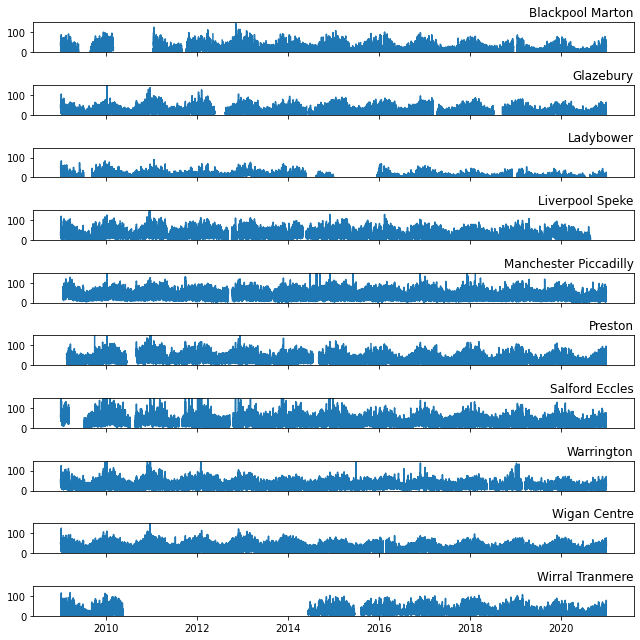

In [16]:
# a quick overview
fig, axs = plt.subplots(10,1, sharex=True, figsize=(9,9))
for i,ax in enumerate(axs):
    site = no2dat.columns[i]
    ax.set_title(site,loc='right')
    ax.set_ylim(0,150)
    ax.plot(no2dat[site])
    plt.tight_layout() 

<p style="color:red">NB latest 6 months data not yet validated.  Outliers for Manchester, Preston, Salford and Warrington.</p>

---

## 2. PM data

In [17]:
POLL = 'pm2.5'
s = pd.concat([   WAR[POLL], LVP[POLL],  ECCL[POLL], PRES[POLL] , BLC2[POLL],
               TRAN[POLL] , WIG5[POLL], MAN3[POLL] ] )
#, LB[POLL] ,  GLAZ[POLL] ]) # no pm data
pm25dat = pd.DataFrame({POLL : s})
# set up table with sites as column
pm25dat = pd.pivot_table(pm25dat, values = POLL, index = ['date'], columns = ['site'])

# group by year and site
df = pm25dat
dfc = df.groupby([df.index.year]).count()
print("                 PM2.5 record counts")
dfc.transpose().style.background_gradient(cmap=cm)

                 PM2.5 record counts


date,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
site,,,,,,,,,,,,
Blackpool Marton,7318,1411,5210,5971,0,5933,7710,8214,8546,7370,7480,8721
Liverpool Speke,7854,7331,8466,8348,8636,7734,8356,8081,8478,8503,8355,5649
Manchester Piccadilly,7142,2273,7807,8498,6934,8430,7991,7355,8242,8302,8072,8422
Preston,6588,8153,7743,7990,7466,6829,7804,8427,8232,8377,8526,8731
Salford Eccles,8464,8071,7747,8223,8600,8319,8521,8166,8336,7310,8754,8776
Warrington,8390,8428,8385,8260,8309,7007,8091,8453,7991,7874,5989,8362
Wigan Centre,7042,3997,0,6507,8424,6993,6639,5634,7917,6807,8416,8771
Wirral Tranmere,6886,8197,8478,8629,8429,5690,8431,8283,8315,8224,8477,8735


<p style="color:red">Significant gaps in record for some sites - particularly Blackpool and Wigan. Warrington missing 2019 data.</p>

In [18]:
pm25dat.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
site,,,,,,,,
Blackpool Marton,"73,884.00",8.73,9.42,-4.80,3.40,6.00,10.60,236.00
Liverpool Speke,"95,791.00",10.13,10.59,-5.00,4.30,7.00,12.00,611.50
Manchester Piccadilly,"89,468.00",11.37,11.59,-4.00,5.00,8.30,14.10,449.10
Preston,"94,866.00",10.23,9.88,-4.20,4.80,7.30,12.10,452.00
Salford Eccles,"99,287.00",12.34,11.34,-4.60,6.00,9.10,15.00,451.80
Warrington,"95,539.00",11.37,10.63,-4.00,5.20,8.00,13.60,381.00
Wigan Centre,"77,147.00",11.50,11.25,-4.00,5.00,8.20,14.10,448.40
Wirral Tranmere,"96,774.00",8.48,9.41,-4.00,3.00,5.59,10.00,206.00


In [19]:
# count of records with negative values
pm25dat[pm25dat<0].count()

site
Blackpool Marton         1788
Liverpool Speke           838
Manchester Piccadilly    1610
Preston                   462
Salford Eccles            186
Warrington                487
Wigan Centre              471
Wirral Tranmere          2501
dtype: int64

<p style="color:red">Negative values - due to calibration errors? Leave unchanged for now as may provide more accurate means when averaging.</p>

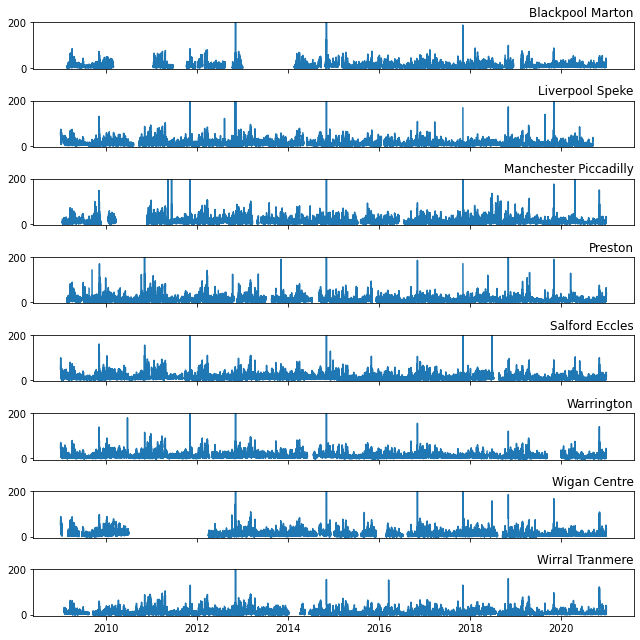

In [20]:
# a quick overview
fig, axs = plt.subplots(8,1, sharex=True, figsize=(9,9))
for i,ax in enumerate(axs):
    site = pm25dat.columns[i]
    ax.set_title(site,loc='right')
    ax.set_ylim(-5,200)
    ax.plot(pm25dat[site])
    plt.tight_layout() 

<p style="color:red">Outliers - check</p>

---

In [21]:
POLL = 'pm10'
s = pd.concat([   WAR[POLL], LVP[POLL],  ECCL[POLL]
#               , PRES[POLL] , BLC2[POLL], TRAN[POLL], MAN3[POLL] # no pm10 data after 2009
#                , WIG5[POLL], LB[POLL] ,  GLAZ[POLL] ]) # no pm10 data
              ])
pm10dat = pd.DataFrame({POLL : s})
# set up table with sites as column
pm10dat = pd.pivot_table(pm10dat, values = POLL, index = ['date'], columns = ['site'])

print(pm10dat.describe().transpose())

# group by year and site
dfc = pm10dat.groupby([pm10dat.index.year]).count()
print("                 PM10 record counts")
dfc.transpose().style.background_gradient(cmap=cm)

                     count  mean   std   min  25%   50%   75%    max
site                                                                
Liverpool Speke  94,824.00 14.73 12.21 -4.00 7.70 11.59 18.20 692.10
Salford Eccles  100,154.00 16.92 13.32 -4.00 9.00 13.82 20.90 651.30
Warrington       91,717.00 16.63 12.02 -3.30 9.10 13.53 20.29 357.00
                 PM10 record counts


date,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
site,,,,,,,,,,,,
Liverpool Speke,7651,7106,8471,8587,8628,7519,8249,8014,8397,8184,8229,5789
Salford Eccles,8552,8635,8200,7970,8580,8460,8386,7894,8388,7559,8754,8776
Warrington,8139,4880,7973,8318,8141,7712,8441,8277,7028,6114,8240,8454


<p style="color:red">Significant gaps in the data in 2010 and 2018 for Warrington</p>

In [22]:
# count of records with negative values
pm10dat[pm10dat<0].count()

site
Liverpool Speke    340
Salford Eccles     139
Warrington         100
dtype: int64

<p style="color:red">Negative Values</p>

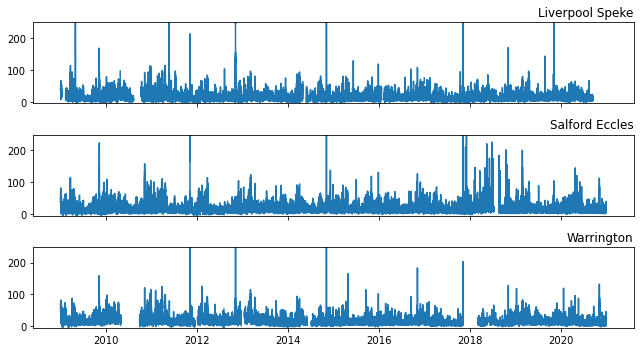

In [23]:
# a quick overview
fig, axs = plt.subplots(3,1, sharex=True, figsize=(9,5))
for i,ax in enumerate(axs):
    site = pm10dat.columns[i]
    ax.set_title(site,loc='right')
    ax.set_ylim(-5,250)
    ax.plot(pm10dat[site])
    plt.tight_layout() 

---

## 3. Ozone Data

In [24]:
POLL = 'o3'
s = pd.concat([   #WAR[POLL], # no ozone data 
                LVP[POLL],  ECCL[POLL]
                , PRES[POLL] , BLC2[POLL], TRAN[POLL], MAN3[POLL]
                , WIG5[POLL], LB[POLL] ,  GLAZ[POLL] ]) 
o3dat = pd.DataFrame({POLL : s})
o3dat = pd.pivot_table(o3dat, values = POLL, index = ['date'], columns = ['site'])

In [25]:
o3dat.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
site,,,,,,,,
Blackpool Marton,"94,830.00",54.53,23.61,0.00,39.91,58.00,71.10,177.77
Glazebury,"99,760.00",43.10,24.93,-1.05,24.00,44.87,61.72,181.71
Ladybower,"91,794.00",53.60,19.44,-1.70,41.31,54.00,66.00,169.19
Liverpool Speke,"99,736.00",47.45,22.77,0.00,32.08,49.34,63.76,166.74
Manchester Piccadilly,"103,032.00",28.81,20.15,0.00,12.00,26.74,42.86,138.55
Preston,"101,852.00",45.00,23.23,-0.10,28.29,46.00,61.92,181.16
Salford Eccles,"42,554.00",31.64,22.94,-1.00,12.00,28.44,48.00,156.00
Wigan Centre,"102,087.00",44.04,26.34,-0.07,22.55,46.00,64.00,204.86
Wirral Tranmere,"77,530.00",48.18,22.17,0.00,33.73,49.54,63.76,169.48


In [26]:
# count of records with negative values
o3dat[o3dat<0].count()

site
Blackpool Marton           0
Glazebury                125
Ladybower                 20
Liverpool Speke            0
Manchester Piccadilly      0
Preston                    1
Salford Eccles             8
Wigan Centre               1
Wirral Tranmere            0
dtype: int64

In [27]:
# group by year and site
dfc = o3dat.groupby([o3dat.index.year]).count()
print("                 Ozone record counts")
dfc.transpose().style.background_gradient(cmap=cm)

                 Ozone record counts


date,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
site,,,,,,,,,,,,
Blackpool Marton,8576,1411,7419,8687,8690,8618,8680,8702,8657,8329,8361,8700
Glazebury,8527,8664,8670,7862,8609,8697,8165,8676,8690,6921,8401,7878
Ladybower,8352,8265,8598,8700,8684,8520,383,8323,8158,6882,8406,8523
Liverpool Speke,8583,8613,8658,8543,8607,7973,8565,8583,8581,8685,8651,5694
Manchester Piccadilly,8490,8510,8681,8577,8643,8628,8631,8528,8325,8655,8651,8713
Preston,8102,8496,8694,8715,8555,7630,8564,8706,8585,8638,8690,8477
Salford Eccles,8572,8540,8231,8647,8564,0,0,0,0,0,0,0
Wigan Centre,8521,8641,8137,8746,8676,8519,8526,7495,8695,8663,8711,8757
Wirral Tranmere,8371,3129,0,0,7934,8676,7462,8542,7764,8254,8699,8699


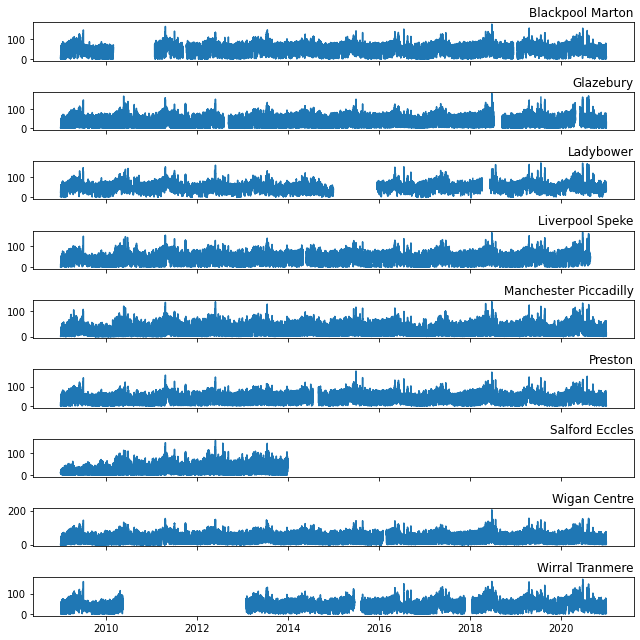

In [28]:
# a quick overview
fig, axs = plt.subplots(9,1, sharex=True, figsize=(9,9))
for i,ax in enumerate(axs):
    site = o3dat.columns[i]
    ax.set_title(site,loc='right')
    ax.plot(o3dat[site])
    plt.tight_layout() 

In [29]:
o3dat.head()

site,Blackpool Marton,Glazebury,Ladybower,Liverpool Speke,Manchester Piccadilly,Preston,Salford Eccles,Wigan Centre,Wirral Tranmere
date,,,,,,,,,
2009-01-01 00:00:00,6.00,nan,nan,nan,nan,2.00,10.00,0.00,nan
2009-01-01 01:00:00,6.00,2.00,4.00,0.00,2.00,8.00,10.00,0.00,nan
2009-01-01 02:00:00,0.00,2.00,2.00,0.00,2.00,0.00,12.00,0.00,nan
2009-01-01 03:00:00,0.00,2.00,14.00,0.00,2.00,2.00,8.00,0.00,nan
2009-01-01 04:00:00,0.00,2.00,22.00,0.00,2.00,2.00,10.00,0.00,nan


In [30]:
# drop Salford as missing so much data
o3dat = o3dat.drop('Salford Eccles', axis=1)
o3dat.head(2)

site,Blackpool Marton,Glazebury,Ladybower,Liverpool Speke,Manchester Piccadilly,Preston,Wigan Centre,Wirral Tranmere
date,,,,,,,,
2009-01-01 00:00:00,6.00,nan,nan,nan,nan,2.00,0.00,nan
2009-01-01 01:00:00,6.00,2.00,4.00,0.00,2.00,8.00,0.00,nan


---

## 4. Meteorological Data

In [31]:
POLL = 'ws' # modelled wind speed
s = pd.concat([   WAR[POLL], LVP[POLL],  ECCL[POLL], PRES[POLL] , BLC2[POLL],
               TRAN[POLL] , WIG5[POLL], MAN3[POLL], LB[POLL] ,  GLAZ[POLL] ]) 
wsdat = pd.DataFrame({POLL : s})
# set up table with sites as column
wsdat = pd.pivot_table(wsdat, values = POLL, index = ['date'], columns = ['site'])

wsdat.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
site,,,,,,,,
Blackpool Marton,"88,467.00",5.64,3.15,0.00,3.30,5.10,7.40,24.70
Glazebury,"88,491.00",4.42,2.53,0.00,2.50,4.00,5.90,19.00
Ladybower,"88,491.00",6.39,3.11,0.00,4.20,6.00,8.10,22.50
Liverpool Speke,"88,467.00",3.55,1.89,0.00,2.10,3.20,4.70,13.40
Manchester Piccadilly,"88,467.00",3.40,1.86,0.00,2.00,3.10,4.50,13.80
Preston,"88,467.00",5.16,2.80,0.00,3.10,4.70,6.80,22.80
Salford Eccles,"88,491.00",4.14,2.27,0.00,2.50,3.80,5.40,19.40
Warrington,"88,419.00",4.50,2.49,0.00,2.70,4.10,5.90,19.30
Wigan Centre,"88,443.00",4.67,2.33,0.00,3.00,4.30,6.00,19.50


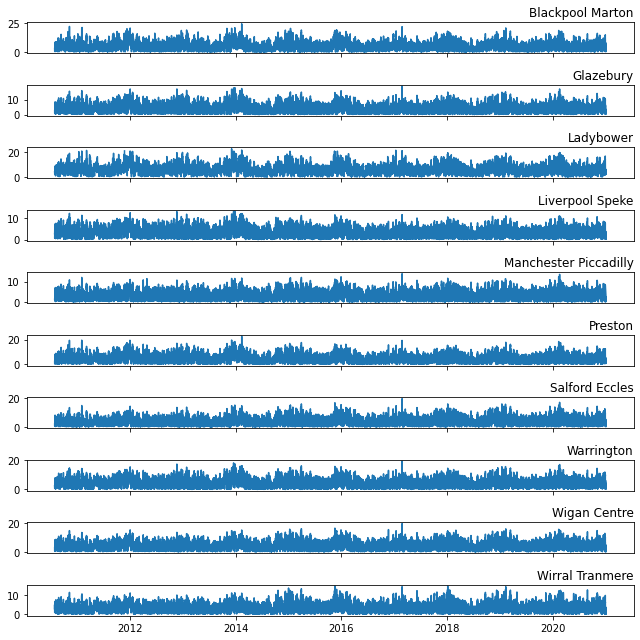

In [32]:
# a quick overview
fig, axs = plt.subplots(10,1, sharex=True, figsize=(9,9))
for i,ax in enumerate(axs):
    site = wsdat.columns[i]
    ax.set_title(site,loc='right')
    ax.plot(wsdat[site])
    plt.tight_layout() 

<p style="color:red"> Modelled wind speed from late 2010 only</p>

---

## If ok write transformed data to file

In [33]:
# write to file
no2dat.to_csv('data/no2dat.csv', index = True)
pm25dat.to_csv('data/pm25dat.csv', index = True)
pm10dat.to_csv('data/pm10dat.csv', index = True)
o3dat.to_csv('data/o3dat.csv', index = True)
wsdat.to_csv('data/wsdat.csv', index = True)

## Notes
- NO2 data for 10 sites. Wirral, Ladybower and Blackpool have large gaps. 
- PM25 data for 8 sites, Blackpool and Wigan have large gaps. Large outliers to investigate. 
- PM10 data only for 3 sites, significant gaps 2010 and 2018 for Warrington 
- Ozone data for 8 sites, large gaps for Wirral, Ladybower and Blackpool
- Wind speed data for 10 sites from late 2010

- There are some negative values - due to calibration errors? Left unchanged. Numbers not significant overall.
- Latest 6 months data not yet validated. Treat with caution